In [337]:
import pandas as pd
from pandas import DataFrame,Series
import numpy as np
from datetime import datetime
from datetime import timedelta
from dateutil.parser import parse
from pandas.tseries.offsets import Hour,Minute
from pandas.tseries.offsets import Day,MonthEnd
import pytz
import matplotlib.pyplot as plt
from scipy.stats import percentileofscore
%matplotlib inline

# 日期和时间数据类型及工具

In [3]:
now = datetime.now()

In [4]:
now

datetime.datetime(2018, 2, 13, 21, 21, 12, 404302)

In [5]:
now.year,now.month,now.day

(2018, 2, 13)

In [6]:
delta = datetime(2011,1,7) - datetime(2008,6,24,8,15)

In [7]:
delta

datetime.timedelta(926, 56700)

In [8]:
delta.days

926

In [9]:
delta.seconds

56700

In [11]:
start = datetime(2011,1,7)

In [12]:
start + timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [13]:
start-2*timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

## 字符串和datetime的相互转换

In [14]:
stamp = datetime(2011,1,3)

In [15]:
str(stamp)

'2011-01-03 00:00:00'

In [16]:
stamp.strftime('%Y-%m-%d')

'2011-01-03'

In [17]:
value = '2011-01-03'

In [18]:
datetime.strptime(value, '%Y-%m-%d')

datetime.datetime(2011, 1, 3, 0, 0)

In [19]:
datestrs = ['7/6/2011','8/6/2011']

In [20]:
[datetime.strptime(x,'%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [22]:
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [23]:
parse('Jan 31, 1997 10:40 PM')

datetime.datetime(1997, 1, 31, 22, 40)

In [24]:
parse('6/12/2011',dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

In [25]:
datestrs

['7/6/2011', '8/6/2011']

In [26]:
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06', '2011-08-06'], dtype='datetime64[ns]', freq=None)

In [27]:
idx = pd.to_datetime(datestrs+[None])

In [28]:
idx

DatetimeIndex(['2011-07-06', '2011-08-06', 'NaT'], dtype='datetime64[ns]', freq=None)

In [29]:
idx[2]

NaT

In [30]:
pd.isnull(idx)

array([False, False,  True])

# 时间序列基础

In [31]:
dates = [datetime(2011,1,2), datetime(2011,1,5), datetime(2011,1,7),
        datetime(2011,1,8),datetime(2011,1,10),datetime(2011,1,12)]

In [33]:
ts = Series(np.random.randn(6), index=dates)

In [34]:
ts

2011-01-02   -1.167646
2011-01-05   -0.146411
2011-01-07   -0.611323
2011-01-08    0.343738
2011-01-10   -1.707311
2011-01-12    0.277666
dtype: float64

In [35]:
type(ts)

pandas.core.series.Series

In [36]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [37]:
ts[::2]

2011-01-02   -1.167646
2011-01-07   -0.611323
2011-01-10   -1.707311
dtype: float64

In [38]:
ts+ts[::2]

2011-01-02   -2.335292
2011-01-05         NaN
2011-01-07   -1.222646
2011-01-08         NaN
2011-01-10   -3.414621
2011-01-12         NaN
dtype: float64

In [39]:
ts.index.dtype

dtype('<M8[ns]')

In [40]:
stamp = ts.index[0]

In [41]:
stamp

Timestamp('2011-01-02 00:00:00')

## 索引、选取、子集构造

In [42]:
stamp = ts.index[2]

In [43]:
ts[stamp]

-0.6113229870615684

In [44]:
ts['1/10/2011']

-1.707310661800818

In [45]:
ts['20110110']

-1.707310661800818

In [46]:
longer_ts = Series(np.random.randn(1000), 
                  index=pd.date_range('1/1/2000',periods=1000))

In [47]:
longer_ts

2000-01-01    1.128991
2000-01-02   -1.830712
2000-01-03    0.568046
2000-01-04   -0.505609
2000-01-05    0.773896
2000-01-06   -0.672927
2000-01-07    0.598832
2000-01-08   -1.362750
2000-01-09   -0.316010
2000-01-10   -0.688165
2000-01-11    0.539858
2000-01-12   -0.103804
2000-01-13    1.233973
2000-01-14    0.784723
2000-01-15   -0.585105
2000-01-16    0.310352
2000-01-17    1.208885
2000-01-18   -0.582132
2000-01-19   -0.161225
2000-01-20   -0.720254
2000-01-21    0.250497
2000-01-22    1.276739
2000-01-23   -1.756201
2000-01-24    0.447735
2000-01-25   -0.002311
2000-01-26    1.478774
2000-01-27    0.530471
2000-01-28   -1.627305
2000-01-29   -0.004335
2000-01-30   -0.762857
                ...   
2002-08-28   -0.247233
2002-08-29   -0.409549
2002-08-30    0.814745
2002-08-31   -1.005803
2002-09-01   -0.385669
2002-09-02   -0.789913
2002-09-03   -0.588540
2002-09-04    0.125159
2002-09-05   -0.505245
2002-09-06   -0.125667
2002-09-07    0.233464
2002-09-08    0.033077
2002-09-09 

In [48]:
longer_ts['2001']

2001-01-01    1.526254
2001-01-02    0.490528
2001-01-03    1.640825
2001-01-04    0.001884
2001-01-05   -0.634754
2001-01-06    1.285014
2001-01-07   -0.629446
2001-01-08    0.261319
2001-01-09    0.017459
2001-01-10   -1.397857
2001-01-11    0.297530
2001-01-12   -3.606544
2001-01-13   -1.949301
2001-01-14   -0.484664
2001-01-15    1.523130
2001-01-16    0.521033
2001-01-17    0.360998
2001-01-18    0.073849
2001-01-19   -0.589533
2001-01-20   -0.414077
2001-01-21   -1.598006
2001-01-22   -0.164007
2001-01-23    0.456290
2001-01-24    2.749653
2001-01-25    1.648418
2001-01-26   -1.547200
2001-01-27   -0.456855
2001-01-28   -0.790332
2001-01-29   -1.439667
2001-01-30    2.861727
                ...   
2001-12-02   -1.340205
2001-12-03    0.588149
2001-12-04    0.025820
2001-12-05   -0.043737
2001-12-06   -1.544889
2001-12-07   -0.130669
2001-12-08   -1.537335
2001-12-09    0.351970
2001-12-10   -0.335381
2001-12-11   -2.024977
2001-12-12    1.142121
2001-12-13    1.132915
2001-12-14 

In [49]:
longer_ts['2001-05']

2001-05-01   -0.235220
2001-05-02   -1.244547
2001-05-03    0.684397
2001-05-04   -1.760040
2001-05-05   -0.143718
2001-05-06   -1.263152
2001-05-07   -0.672069
2001-05-08   -0.640760
2001-05-09   -1.592656
2001-05-10   -0.306299
2001-05-11    2.595492
2001-05-12   -1.869671
2001-05-13    0.618590
2001-05-14    0.349748
2001-05-15    1.236863
2001-05-16   -0.293601
2001-05-17    0.628227
2001-05-18   -0.305362
2001-05-19    0.171333
2001-05-20    0.160998
2001-05-21   -2.087220
2001-05-22   -0.775834
2001-05-23    0.685732
2001-05-24    0.612134
2001-05-25   -0.474094
2001-05-26   -0.335036
2001-05-27    0.984031
2001-05-28    0.594590
2001-05-29    0.603807
2001-05-30   -2.041881
2001-05-31   -1.519131
Freq: D, dtype: float64

In [50]:
ts[datetime(2011,1,7):]

2011-01-07   -0.611323
2011-01-08    0.343738
2011-01-10   -1.707311
2011-01-12    0.277666
dtype: float64

In [51]:
ts

2011-01-02   -1.167646
2011-01-05   -0.146411
2011-01-07   -0.611323
2011-01-08    0.343738
2011-01-10   -1.707311
2011-01-12    0.277666
dtype: float64

In [52]:
ts['1/6/2011':'1/11/2011']

2011-01-07   -0.611323
2011-01-08    0.343738
2011-01-10   -1.707311
dtype: float64

In [53]:
ts.truncate(after='1/9/2011')

2011-01-02   -1.167646
2011-01-05   -0.146411
2011-01-07   -0.611323
2011-01-08    0.343738
dtype: float64

In [54]:
dates = pd.date_range('1/1/2000',periods=100, freq='W-WED')

In [55]:
long_df = DataFrame(np.random.randn(100,4),
                   index=dates,
                   columns=['Colorado','Texas','New York','Ohio'])

In [57]:
long_df.loc['5-2001']

,Colorado,Texas,New York,Ohio
2001-05-02,0.164468,2.052923,-0.591625,1.581329
2001-05-09,-1.483089,-0.776096,0.616343,-0.475416
2001-05-16,-1.301956,-0.327954,1.181022,0.206788
2001-05-23,-1.328043,0.334238,0.508791,-0.571859
2001-05-30,0.439824,0.974349,1.980168,0.185298


## 带有重复索引的时间序列

In [59]:
dates = pd.DatetimeIndex(['1/1/2000','1/2/2000','1/2/2000',
                         '1/2/2000','1/3/2000'])

In [60]:
dup_ts = Series(np.arange(5),index=dates)

In [61]:
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int64

In [62]:
dup_ts.index.is_unique

False

In [63]:
dup_ts['1/3/2000']

4

In [64]:
dup_ts['1/2/2000']

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int64

In [65]:
grouped = dup_ts.groupby(level=0)

In [66]:
grouped.mean()

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int64

In [67]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

# 日期的范围、频率以及移动

In [68]:
ts 

2011-01-02   -1.167646
2011-01-05   -0.146411
2011-01-07   -0.611323
2011-01-08    0.343738
2011-01-10   -1.707311
2011-01-12    0.277666
dtype: float64

In [79]:
ts1 = ts.resample('D')

In [84]:
ts1.mean()

2011-01-02   -1.167646
2011-01-03         NaN
2011-01-04         NaN
2011-01-05   -0.146411
2011-01-06         NaN
2011-01-07   -0.611323
2011-01-08    0.343738
2011-01-09         NaN
2011-01-10   -1.707311
2011-01-11         NaN
2011-01-12    0.277666
Freq: D, dtype: float64

In [72]:
index = pd.date_range('4/1/2012','6/1/2012')

In [73]:
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [74]:
pd.date_range(start='4/1/2012',periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [75]:
pd.date_range(end='6/1/2012',periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

In [76]:
pd.date_range('1/1/2000','12/1/2000',freq='BM')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

In [77]:
pd.date_range('5/2/2012 12:56:31', periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [78]:
pd.date_range('5/2/2012 12:56:31', periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

## 频率和日期偏移量

In [86]:
hour = Hour()
hour

<Hour>

In [87]:
four_hours = Hour(4)

In [88]:
four_hours

<4 * Hours>

In [92]:
pd.date_range('1/1/2000','1/3/2000 23:59', freq=four_hours)

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [89]:
pd.date_range('1/1/2000','1/3/2000 23:59', freq='4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [90]:
Hour(2)+Minute(30)

<150 * Minutes>

In [91]:
pd.date_range('1/1/2000','1/3/2000',freq='2h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00',
               '2000-01-01 15:00:00', '2000-01-01 16:30:00',
               '2000-01-01 18:00:00', '2000-01-01 19:30:00',
               '2000-01-01 21:00:00', '2000-01-01 22:30:00',
               '2000-01-02 00:00:00', '2000-01-02 01:30:00',
               '2000-01-02 03:00:00', '2000-01-02 04:30:00',
               '2000-01-02 06:00:00', '2000-01-02 07:30:00',
               '2000-01-02 09:00:00', '2000-01-02 10:30:00',
               '2000-01-02 12:00:00', '2000-01-02 13:30:00',
               '2000-01-02 15:00:00', '2000-01-02 16:30:00',
               '2000-01-02 18:00:00', '2000-01-02 19:30:00',
               '2000-01-02 21:00:00', '2000-01-02 22:30:00',
               '2000-01-

In [93]:
rng = pd.date_range('1/1/2012','9/1/2012',freq='WOM-3FRI')

In [94]:
list(rng)

[Timestamp('2012-01-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-02-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-03-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-04-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-05-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-06-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-07-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-08-17 00:00:00', freq='WOM-3FRI')]

## 移动(超前和滞后)数据

In [98]:
ts = Series(np.random.randn(4), 
            index=pd.date_range('1/1/2000',periods=4,freq='M')
           )

In [99]:
ts

2000-01-31   -0.499752
2000-02-29    1.032136
2000-03-31   -2.123721
2000-04-30   -1.083096
Freq: M, dtype: float64

In [100]:
ts.shift(3)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31         NaN
2000-04-30   -0.499752
Freq: M, dtype: float64

In [101]:
ts.shift(-3)

2000-01-31   -1.083096
2000-02-29         NaN
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

In [102]:
ts/ts.shift(1)-1

2000-01-31         NaN
2000-02-29   -3.065295
2000-03-31   -3.057598
2000-04-30   -0.490001
Freq: M, dtype: float64

In [103]:
ts.shift(2, freq='M')

2000-03-31   -0.499752
2000-04-30    1.032136
2000-05-31   -2.123721
2000-06-30   -1.083096
Freq: M, dtype: float64

In [104]:
ts

2000-01-31   -0.499752
2000-02-29    1.032136
2000-03-31   -2.123721
2000-04-30   -1.083096
Freq: M, dtype: float64

In [105]:
ts.shift(3,freq='D')

2000-02-03   -0.499752
2000-03-03    1.032136
2000-04-03   -2.123721
2000-05-03   -1.083096
dtype: float64

In [106]:
ts.shift(1,freq='3D')

2000-02-03   -0.499752
2000-03-03    1.032136
2000-04-03   -2.123721
2000-05-03   -1.083096
dtype: float64

In [107]:
ts.shift(1,freq='90T')

2000-01-31 01:30:00   -0.499752
2000-02-29 01:30:00    1.032136
2000-03-31 01:30:00   -2.123721
2000-04-30 01:30:00   -1.083096
Freq: M, dtype: float64

In [109]:
now = datetime(2011,11,17)

In [110]:
now+3*Day()

Timestamp('2011-11-20 00:00:00')

In [112]:
now+MonthEnd()

Timestamp('2011-11-30 00:00:00')

In [113]:
now+MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

In [114]:
offset = MonthEnd()

In [115]:
offset.rollforward(now)

Timestamp('2011-11-30 00:00:00')

In [116]:
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

In [117]:
ts = Series(np.random.randn(20),
           index=pd.date_range('1/15/2000',periods=20,freq='4d'))

In [118]:
ts.groupby(offset.rollforward).mean()

2000-01-31   -0.996091
2000-02-29    0.107779
2000-03-31   -0.222478
dtype: float64

In [120]:
ts.resample('M').mean()

2000-01-31   -0.996091
2000-02-29    0.107779
2000-03-31   -0.222478
Freq: M, dtype: float64

# 时区处理

In [122]:
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [123]:
tz = pytz.timezone('US/Eastern')

In [124]:
tz

<DstTzInfo 'US/Eastern' LMT-1 day, 19:04:00 STD>

In [125]:
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')

In [126]:
ts = Series(np.random.randn(len(rng)), index=rng)

In [137]:
ts

2012-03-09 09:30:00    0.813945
2012-03-10 09:30:00   -0.058369
2012-03-11 09:30:00   -0.492653
2012-03-12 09:30:00   -0.138146
2012-03-13 09:30:00    0.634837
2012-03-14 09:30:00    0.474295
Freq: D, dtype: float64

In [127]:
print(ts.index.tz)

None


In [128]:
pd.date_range('3/9/2012 9:30', periods=10, freq='D',tz='UTC')

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [129]:
ts_utc = ts.tz_localize('UTC')

In [130]:
ts_utc

2012-03-09 09:30:00+00:00    0.813945
2012-03-10 09:30:00+00:00   -0.058369
2012-03-11 09:30:00+00:00   -0.492653
2012-03-12 09:30:00+00:00   -0.138146
2012-03-13 09:30:00+00:00    0.634837
2012-03-14 09:30:00+00:00    0.474295
Freq: D, dtype: float64

In [131]:
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [132]:
ts_utc.tz_convert('US/Eastern')

2012-03-09 04:30:00-05:00    0.813945
2012-03-10 04:30:00-05:00   -0.058369
2012-03-11 05:30:00-04:00   -0.492653
2012-03-12 05:30:00-04:00   -0.138146
2012-03-13 05:30:00-04:00    0.634837
2012-03-14 05:30:00-04:00    0.474295
Freq: D, dtype: float64

In [133]:
ts_eastern = ts.tz_localize('US/Eastern')

In [134]:
ts_eastern.tz_convert('UTC')

2012-03-09 14:30:00+00:00    0.813945
2012-03-10 14:30:00+00:00   -0.058369
2012-03-11 13:30:00+00:00   -0.492653
2012-03-12 13:30:00+00:00   -0.138146
2012-03-13 13:30:00+00:00    0.634837
2012-03-14 13:30:00+00:00    0.474295
Freq: D, dtype: float64

In [135]:
ts_eastern.tz_convert('Europe/Berlin')

2012-03-09 15:30:00+01:00    0.813945
2012-03-10 15:30:00+01:00   -0.058369
2012-03-11 14:30:00+01:00   -0.492653
2012-03-12 14:30:00+01:00   -0.138146
2012-03-13 14:30:00+01:00    0.634837
2012-03-14 14:30:00+01:00    0.474295
Freq: D, dtype: float64

In [136]:
ts.index.tz_localize('Asia/Shanghai')

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq='D')

## 操作时区意识型Timestamp对象

In [152]:
stamp = pd.Timestamp('2011-03-12 04:00')

In [153]:
stamp

Timestamp('2011-03-12 04:00:00')

In [154]:
stamp_utc = stamp.tz_localize('utc')

In [155]:
stamp_utc

Timestamp('2011-03-12 04:00:00+0000', tz='UTC')

In [140]:
stamp_utc.tz_convert('US/Eastern')

Timestamp('2011-03-11 23:00:00-0500', tz='US/Eastern')

In [141]:
stamp_moscow = pd.Timestamp('2011-03-12 04:00', tz='Europe/Moscow')

In [142]:
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

In [143]:
stamp_utc.value

1299902400000000000

In [144]:
stamp_utc.tz_convert('US/Eastern').value

1299902400000000000

In [145]:
stamp = pd.Timestamp('2012-03-12 01:30', tz='US/Eastern')

In [146]:
stamp+Hour()

Timestamp('2012-03-12 02:30:00-0400', tz='US/Eastern')

In [147]:
stamp = pd.Timestamp('2012-11-04 00:30', tz='US/Eastern')

In [148]:
stamp

Timestamp('2012-11-04 00:30:00-0400', tz='US/Eastern')

In [149]:
stamp + 2*Hour()

Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

## 不同时区之间的运算

In [156]:
rng = pd.date_range('3/7/2012 9:30',periods=10,freq='B')

In [157]:
ts = Series(np.random.randn(len(rng)), index=rng)

In [158]:
ts

2012-03-07 09:30:00    0.199653
2012-03-08 09:30:00    1.700495
2012-03-09 09:30:00   -1.792006
2012-03-12 09:30:00    0.782539
2012-03-13 09:30:00    1.126600
2012-03-14 09:30:00    0.324525
2012-03-15 09:30:00   -0.420028
2012-03-16 09:30:00   -1.286620
2012-03-19 09:30:00   -1.376960
2012-03-20 09:30:00   -0.678727
Freq: B, dtype: float64

In [159]:
ts1 = ts[:7].tz_localize('Europe/London')

In [163]:
ts1

2012-03-07 09:30:00+00:00    0.199653
2012-03-08 09:30:00+00:00    1.700495
2012-03-09 09:30:00+00:00   -1.792006
2012-03-12 09:30:00+00:00    0.782539
2012-03-13 09:30:00+00:00    1.126600
2012-03-14 09:30:00+00:00    0.324525
2012-03-15 09:30:00+00:00   -0.420028
Freq: B, dtype: float64

In [160]:
ts2 = ts1[2:].tz_convert('Europe/Moscow')

In [164]:
ts2

2012-03-09 13:30:00+04:00   -1.792006
2012-03-12 13:30:00+04:00    0.782539
2012-03-13 13:30:00+04:00    1.126600
2012-03-14 13:30:00+04:00    0.324525
2012-03-15 13:30:00+04:00   -0.420028
Freq: B, dtype: float64

In [161]:
result = ts1+ts2

In [165]:
result

2012-03-07 09:30:00+00:00         NaN
2012-03-08 09:30:00+00:00         NaN
2012-03-09 09:30:00+00:00   -3.584011
2012-03-12 09:30:00+00:00    1.565077
2012-03-13 09:30:00+00:00    2.253199
2012-03-14 09:30:00+00:00    0.649049
2012-03-15 09:30:00+00:00   -0.840056
Freq: B, dtype: float64

In [162]:
result.index

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

# 时期及其算术运算

In [166]:
p = pd.Period(2007, freq='A-DEC')

In [167]:
p

Period('2007', 'A-DEC')

In [168]:
p+5

Period('2012', 'A-DEC')

In [169]:
p-2

Period('2005', 'A-DEC')

In [170]:
pd.Period('2014',freq='A-DEC') - p

7

In [171]:
rng = pd.period_range('1/1/2000','6/30/2000',freq='M')

In [172]:
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M')

In [173]:
Series(np.random.randn(6), index=rng)

2000-01    1.029486
2000-02   -0.763039
2000-03    0.032578
2000-04    1.322113
2000-05   -0.893327
2000-06    0.861401
Freq: M, dtype: float64

In [174]:
values = ['2001Q3','2002Q2','2003Q1']

In [175]:
index = pd.PeriodIndex(values, freq='Q-DEC')

In [176]:
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

## 时期的频率转换

In [192]:
p = pd.Period('2007', freq='A-DEC')

In [193]:
p

Period('2007', 'A-DEC')

In [194]:
p.asfreq('M',how='start')

Period('2007-01', 'M')

In [179]:
p.asfreq('M',how='end')

Period('2007-12', 'M')

In [217]:
p = pd.Period('2007',freq='A-JUN')

In [197]:
p.asfreq('M','start')

Period('2006-07', 'M')

In [198]:
p.asfreq('M', 'end')

Period('2007-06', 'M')

In [221]:
p = pd.Period('2007-07', 'M')

In [222]:
p.asfreq('A-JUN')

Period('2008', 'A-JUN')

In [224]:
p.asfreq('A-JUN').asfreq('M','end')

Period('2008-06', 'M')

In [185]:
rng = pd.period_range('2006', '2009', freq='A-DEC')

In [186]:
ts = Series(np.random.randn(len(rng)), index=rng)

In [187]:
ts

2006    0.321559
2007    0.177494
2008    0.175429
2009   -0.619182
Freq: A-DEC, dtype: float64

In [188]:
ts.asfreq('M', how='start')

2006-01    0.321559
2007-01    0.177494
2008-01    0.175429
2009-01   -0.619182
Freq: M, dtype: float64

In [189]:
ts.asfreq('B',how='end')

2006-12-29    0.321559
2007-12-31    0.177494
2008-12-31    0.175429
2009-12-31   -0.619182
Freq: B, dtype: float64

## 按季度计算的时期频率

In [225]:
p = pd.Period('2012Q4',freq='Q-JAN')

In [226]:
p

Period('2012Q4', 'Q-JAN')

In [227]:
p.asfreq('D','start')

Period('2011-11-01', 'D')

In [228]:
p.asfreq('D','end')

Period('2012-01-31', 'D')

In [229]:
p4pm = (p.asfreq('B','e')-1).asfreq('T','s')+16*60

In [230]:
p4pm

Period('2012-01-30 16:00', 'T')

In [231]:
p4pm.to_timestamp()

Timestamp('2012-01-30 16:00:00')

In [232]:
rng = pd.period_range('2011Q3','2012Q4',freq='Q-JAN')

In [233]:
ts = Series(np.arange(len(rng)), index=rng)

In [234]:
ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int64

In [235]:
new_rng = (rng.asfreq('B','e')-1).asfreq('T','s')+16*60

In [236]:
ts.index=new_rng.to_timestamp()

In [237]:
ts

2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int64

## 将Timestamp转换为Period(及其反向过程)

In [238]:
rng = pd.date_range('1/1/2000',periods=3, freq='M')

In [239]:
ts = Series(np.random.randn(3), index=rng)

In [240]:
pts = ts.to_period()

In [241]:
ts

2000-01-31    1.137140
2000-02-29   -1.978647
2000-03-31    0.747824
Freq: M, dtype: float64

In [242]:
pts

2000-01    1.137140
2000-02   -1.978647
2000-03    0.747824
Freq: M, dtype: float64

In [243]:
rng = pd.date_range('1/29/2000', periods=6, freq='D')

In [246]:
ts2 = Series(np.random.randn(6), index=rng)

In [247]:
ts2.to_period('M')

2000-01    1.947324
2000-01    0.176117
2000-01   -1.013110
2000-02   -3.053255
2000-02    1.169194
2000-02    1.057347
Freq: M, dtype: float64

In [248]:
pts = ts.to_period()

In [249]:
pts

2000-01    1.137140
2000-02   -1.978647
2000-03    0.747824
Freq: M, dtype: float64

In [250]:
pts.to_timestamp(how='end')

2000-01-31    1.137140
2000-02-29   -1.978647
2000-03-31    0.747824
Freq: M, dtype: float64

## 通过数组创建PeriodIndex

In [251]:
data = pd.read_csv('ch08/macrodata.csv')

In [252]:
data.year

0      1959.0
1      1959.0
2      1959.0
3      1959.0
4      1960.0
5      1960.0
6      1960.0
7      1960.0
8      1961.0
9      1961.0
10     1961.0
11     1961.0
12     1962.0
13     1962.0
14     1962.0
15     1962.0
16     1963.0
17     1963.0
18     1963.0
19     1963.0
20     1964.0
21     1964.0
22     1964.0
23     1964.0
24     1965.0
25     1965.0
26     1965.0
27     1965.0
28     1966.0
29     1966.0
        ...  
173    2002.0
174    2002.0
175    2002.0
176    2003.0
177    2003.0
178    2003.0
179    2003.0
180    2004.0
181    2004.0
182    2004.0
183    2004.0
184    2005.0
185    2005.0
186    2005.0
187    2005.0
188    2006.0
189    2006.0
190    2006.0
191    2006.0
192    2007.0
193    2007.0
194    2007.0
195    2007.0
196    2008.0
197    2008.0
198    2008.0
199    2008.0
200    2009.0
201    2009.0
202    2009.0
Name: year, Length: 203, dtype: float64

In [253]:
data.quarter

0      1.0
1      2.0
2      3.0
3      4.0
4      1.0
5      2.0
6      3.0
7      4.0
8      1.0
9      2.0
10     3.0
11     4.0
12     1.0
13     2.0
14     3.0
15     4.0
16     1.0
17     2.0
18     3.0
19     4.0
20     1.0
21     2.0
22     3.0
23     4.0
24     1.0
25     2.0
26     3.0
27     4.0
28     1.0
29     2.0
      ... 
173    2.0
174    3.0
175    4.0
176    1.0
177    2.0
178    3.0
179    4.0
180    1.0
181    2.0
182    3.0
183    4.0
184    1.0
185    2.0
186    3.0
187    4.0
188    1.0
189    2.0
190    3.0
191    4.0
192    1.0
193    2.0
194    3.0
195    4.0
196    1.0
197    2.0
198    3.0
199    4.0
200    1.0
201    2.0
202    3.0
Name: quarter, Length: 203, dtype: float64

In [254]:
index = pd.PeriodIndex(year=data.year,quarter=data.quarter,freq='Q-DEC')

In [255]:
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')

In [256]:
data.index=index

In [257]:
data.infl

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
1960Q2    0.14
1960Q3    2.70
1960Q4    1.21
1961Q1   -0.40
1961Q2    1.47
1961Q3    0.80
1961Q4    0.80
1962Q1    2.26
1962Q2    0.13
1962Q3    2.11
1962Q4    0.79
1963Q1    0.53
1963Q2    2.75
1963Q3    0.78
1963Q4    2.46
1964Q1    0.13
1964Q2    0.90
1964Q3    1.29
1964Q4    2.05
1965Q1    1.28
1965Q2    2.54
1965Q3    0.89
1965Q4    2.90
1966Q1    4.99
1966Q2    2.10
          ... 
2002Q2    1.56
2002Q3    2.66
2002Q4    3.08
2003Q1    1.31
2003Q2    1.09
2003Q3    2.60
2003Q4    3.02
2004Q1    2.35
2004Q2    3.61
2004Q3    3.58
2004Q4    2.09
2005Q1    4.15
2005Q2    1.85
2005Q3    9.14
2005Q4    0.40
2006Q1    2.60
2006Q2    3.97
2006Q3   -1.58
2006Q4    3.30
2007Q1    4.58
2007Q2    2.75
2007Q3    3.45
2007Q4    6.38
2008Q1    2.82
2008Q2    8.53
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, Length: 203, dtype: float64

# 重采样及频率转换

In [258]:
rng = pd.date_range('1/1/2000', periods=100, freq='D')

In [260]:
ts = Series(np.random.randn(len(rng)), index=rng)

In [262]:
ts.resample('M').mean()

2000-01-31    0.215699
2000-02-29   -0.108752
2000-03-31   -0.323900
2000-04-30    0.038940
Freq: M, dtype: float64

In [263]:
ts.resample('M',kind='period').mean()

2000-01    0.215699
2000-02   -0.108752
2000-03   -0.323900
2000-04    0.038940
Freq: M, dtype: float64

## 降采样

In [264]:
rng = pd.date_range('1/1/2000',periods=12,freq='T')

In [265]:
ts = Series(np.arange(12), index=rng)

In [266]:
ts.resample('5min').sum()

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int64

In [267]:
ts.resample('5min',closed='left').sum()

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int64

In [268]:
ts.resample('5min',closed='left',label='left').sum()

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int64

In [269]:
ts.resample('5min', loffset='-1s').sum()

1999-12-31 23:59:59    10
2000-01-01 00:04:59    35
2000-01-01 00:09:59    21
Freq: 5T, dtype: int64

In [270]:
ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


In [271]:
rng=pd.date_range('1/1/2000',periods=100,freq='D')

In [272]:
ts = Series(np.arange(100), index=rng)

In [273]:
ts.groupby(lambda x:x.month).mean()

1    15
2    45
3    75
4    95
dtype: int64

In [274]:
ts.groupby(lambda x:x.weekday).mean()

0    47.5
1    48.5
2    49.5
3    50.5
4    51.5
5    49.0
6    50.0
dtype: float64

## 升采样和插值

In [279]:
frame = DataFrame(np.random.randn(2,4),
                 index=pd.date_range('1/1/2000',periods=2,freq='W-WED'),
                 columns=['Colorado','Texas','New York','Ohio'])

In [280]:
frame[:5]

,Colorado,Texas,New York,Ohio
2000-01-05,2.504308,-0.701183,1.745683,-0.839094
2000-01-12,0.631411,-0.351064,-0.876529,-1.704198


In [281]:
df_daily = frame.resample('D')

In [287]:
df_daily.mean()

,Colorado,Texas,New York,Ohio
2000-01-05,2.504308,-0.701183,1.745683,-0.839094
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,0.631411,-0.351064,-0.876529,-1.704198


In [284]:
frame.resample('D').ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,2.504308,-0.701183,1.745683,-0.839094
2000-01-06,2.504308,-0.701183,1.745683,-0.839094
2000-01-07,2.504308,-0.701183,1.745683,-0.839094
2000-01-08,2.504308,-0.701183,1.745683,-0.839094
2000-01-09,2.504308,-0.701183,1.745683,-0.839094
2000-01-10,2.504308,-0.701183,1.745683,-0.839094
2000-01-11,2.504308,-0.701183,1.745683,-0.839094
2000-01-12,0.631411,-0.351064,-0.876529,-1.704198


In [285]:
frame.resample('D',limit=2).ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,2.504308,-0.701183,1.745683,-0.839094
2000-01-06,2.504308,-0.701183,1.745683,-0.839094
2000-01-07,2.504308,-0.701183,1.745683,-0.839094
2000-01-08,2.504308,-0.701183,1.745683,-0.839094
2000-01-09,2.504308,-0.701183,1.745683,-0.839094
2000-01-10,2.504308,-0.701183,1.745683,-0.839094
2000-01-11,2.504308,-0.701183,1.745683,-0.839094
2000-01-12,0.631411,-0.351064,-0.876529,-1.704198


In [286]:
frame.resample('W-THU').ffill()

,Colorado,Texas,New York,Ohio
2000-01-06,2.504308,-0.701183,1.745683,-0.839094
2000-01-13,0.631411,-0.351064,-0.876529,-1.704198


## 通过时期进行重采样

In [288]:
frame = DataFrame(np.random.randn(24,4),
                 index=pd.period_range('1-2000','12-2001',freq='M'),
                 columns=['Colorado','Texas','New York','Ohio'])

In [289]:
frame[:5]

,Colorado,Texas,New York,Ohio
2000-01,-1.156545,0.809547,-1.354949,-1.291312
2000-02,-0.485579,-0.827719,1.343356,-0.617164
2000-03,0.230846,-0.318784,1.036755,0.393735
2000-04,0.098188,-1.368971,-0.843341,-1.368462
2000-05,-0.029516,0.730558,-0.105121,-0.497995


In [290]:
annual_frame = frame.resample('A-DEC').mean()

In [291]:
annual_frame

,Colorado,Texas,New York,Ohio
2000,-0.263523,-0.243630,-0.176814,-0.664721
2001,-0.155279,-0.441532,0.152416,0.395155


In [293]:
annual_frame.resample('Q-DEC').ffill()

,Colorado,Texas,New York,Ohio
2000Q1,-0.263523,-0.243630,-0.176814,-0.664721
2000Q2,-0.263523,-0.243630,-0.176814,-0.664721
2000Q3,-0.263523,-0.243630,-0.176814,-0.664721
2000Q4,-0.263523,-0.243630,-0.176814,-0.664721
2001Q1,-0.155279,-0.441532,0.152416,0.395155
2001Q2,-0.155279,-0.441532,0.152416,0.395155
2001Q3,-0.155279,-0.441532,0.152416,0.395155
2001Q4,-0.155279,-0.441532,0.152416,0.395155


In [294]:
annual_frame.resample('Q-DEC',convention='start').ffill()

,Colorado,Texas,New York,Ohio
2000Q1,-0.263523,-0.243630,-0.176814,-0.664721
2000Q2,-0.263523,-0.243630,-0.176814,-0.664721
2000Q3,-0.263523,-0.243630,-0.176814,-0.664721
2000Q4,-0.263523,-0.243630,-0.176814,-0.664721
2001Q1,-0.155279,-0.441532,0.152416,0.395155
2001Q2,-0.155279,-0.441532,0.152416,0.395155
2001Q3,-0.155279,-0.441532,0.152416,0.395155
2001Q4,-0.155279,-0.441532,0.152416,0.395155


In [295]:
annual_frame.resample('Q-MAR').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,-0.263523,-0.243630,-0.176814,-0.664721
2001Q1,-0.263523,-0.243630,-0.176814,-0.664721
2001Q2,-0.263523,-0.243630,-0.176814,-0.664721
2001Q3,-0.263523,-0.243630,-0.176814,-0.664721
2001Q4,-0.155279,-0.441532,0.152416,0.395155
2002Q1,-0.155279,-0.441532,0.152416,0.395155
2002Q2,-0.155279,-0.441532,0.152416,0.395155
2002Q3,-0.155279,-0.441532,0.152416,0.395155


# 时间序列绘图

In [296]:
close_px_all = pd.read_csv('ch09/stock_px.csv', parse_dates=True,index_col=0)

In [297]:
close_px = close_px_all[['AAPL','MSFT','XOM']]

In [298]:
close_px = close_px.resample('B').ffill()

In [299]:
close_px

,AAPL,MSFT,XOM
1990-02-01,7.86,0.51,6.12
1990-02-02,8.00,0.51,6.24
1990-02-05,8.18,0.51,6.25
1990-02-06,8.12,0.51,6.23
1990-02-07,7.77,0.51,6.33
1990-02-08,7.71,0.51,6.35
1990-02-09,8.00,0.52,6.37
1990-02-12,7.94,0.52,6.22
1990-02-13,8.06,0.52,6.23
1990-02-14,8.00,0.52,6.20


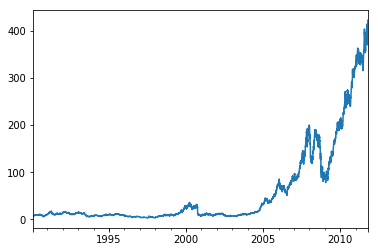

In [302]:
close_px['AAPL'].plot()

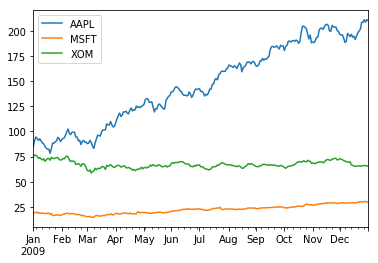

In [303]:
close_px.loc['2009'].plot()

In [304]:
close_px.head()

,AAPL,MSFT,XOM
1990-02-01,7.86,0.51,6.12
1990-02-02,8.00,0.51,6.24
1990-02-05,8.18,0.51,6.25
1990-02-06,8.12,0.51,6.23
1990-02-07,7.77,0.51,6.33


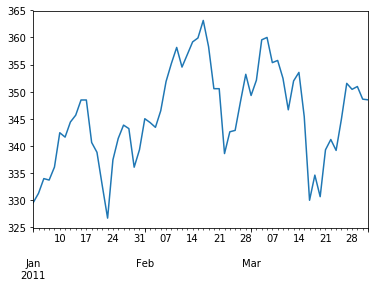

In [305]:
close_px['AAPL'].loc['01-2011':'03-2011'].plot()

In [306]:
appl_q = close_px['AAPL'].resample('Q-DEC').ffill()

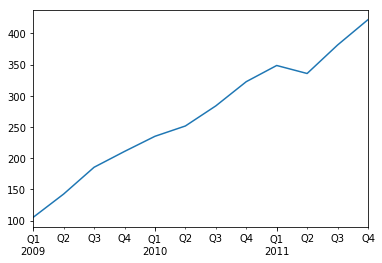

In [307]:
appl_q.loc['2009':].plot()

# 移动窗口函数

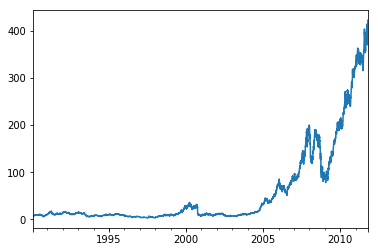

In [309]:
close_px.AAPL.plot()

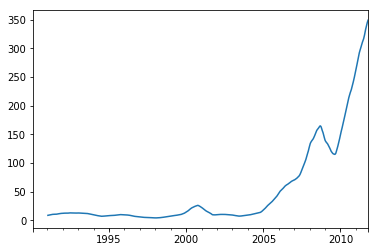

In [311]:
#pd.rolling_mean(close_px.AAPL, 250).plot()
close_px.AAPL.rolling(250).mean().plot()

In [313]:
appl_std250 = close_px.AAPL.rolling(250,min_periods=10).mean()

In [315]:
appl_std250[5:12]

1990-02-08         NaN
1990-02-09         NaN
1990-02-12         NaN
1990-02-13         NaN
1990-02-14    7.964000
1990-02-15    7.967273
1990-02-16    7.962500
Freq: B, Name: AAPL, dtype: float64

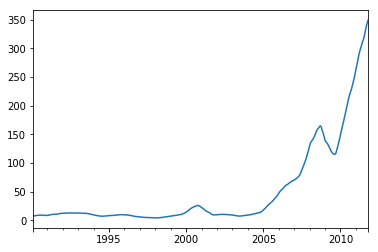

In [316]:
appl_std250.plot()

In [317]:
expanding_mean = lambda x: x.rolling(len(x),min_periods=1).mean()

/home/parallels/anaconda2/lib/python2.7/site-packages/matplotlib/scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


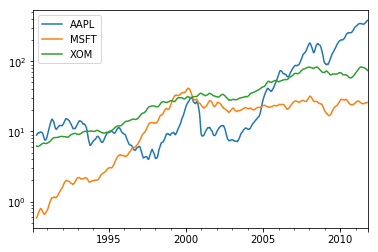

In [319]:
close_px.rolling(60).mean().plot(logy=True)

## 指数加权平均

Text(0.5,1,u'Exponentially-weighted MA')

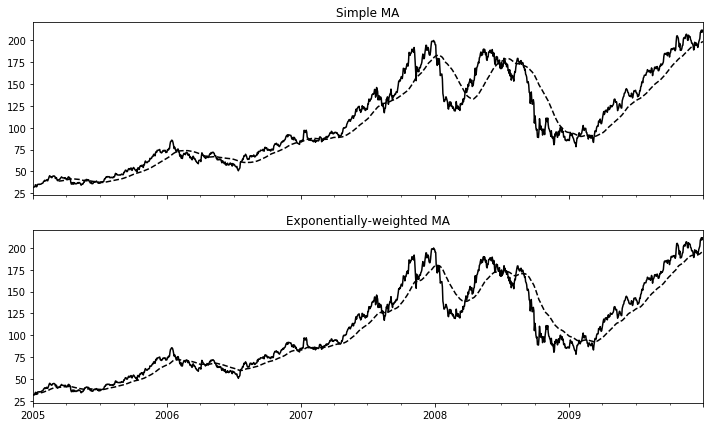

In [330]:
fig,axes = plt.subplots(nrows=2,ncols=1,sharex=True,
                        sharey=True,figsize=(12,7))
aapl_px = close_px.AAPL['2005':'2009']
ma60 = aapl_px.rolling(60,min_periods=50).mean()
ewma60 = aapl_px.ewm(span=60).mean()

aapl_px.plot(style='k-',ax=axes[0])
ma60.plot(style='k--',ax=axes[0])
aapl_px.plot(style='k-', ax=axes[1])
ewma60.plot(style='k--', ax=axes[1])

axes[0].set_title('Simple MA')
axes[1].set_title('Exponentially-weighted MA')

## 二元移动窗口函数

In [331]:
spx_px = close_px_all['SPX']

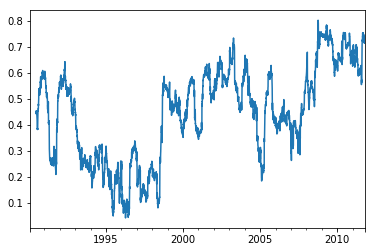

In [334]:
spx_rets = spx_px/spx_px.shift(1)-1
returns = close_px.pct_change()
corr = returns.AAPL.rolling(125,min_periods=100).corr(spx_rets)
corr.plot()

In [335]:
corr = returns.rolling(125,min_periods=100).corr(spx_rets)

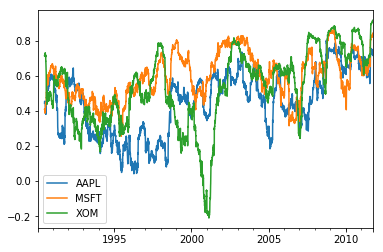

In [336]:
corr.plot()

## 用户定义的移动窗口函数

In [338]:
score_at_2percent = lambda x: percentileofscore(x, 0.02)
result = returns.AAPL.rolling(250).apply(score_at_2percent)

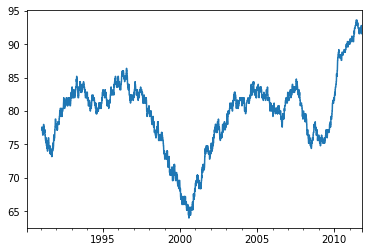

In [339]:
result.plot()